Datatrained
Evaluation Project - 1
Baseball Case Study
Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)


In [188]:
import pandas as pd
import numpy as np

In [189]:
df=pd.read_csv('baseballcasestudy.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [190]:
df=df.rename({'W':'Win','R':'Runs','AB': 'At Bats','H':'Hits','2B':'Doubles','3B':'Triples','HR':'Homeruns','BB':'Walks','SO':'Strikeouts','SB':'Stolen Bases','RA':'Runs Allowed','ER':'Earned Runs','ERA':'Earned Run Average','SHO':'Shutouts','SV':'Saves','E':'Errors'},axis=1)
df

,Win,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,CG,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [191]:
df=df.drop('CG',axis=1)
df

,Win,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,10,40,97


In [192]:
df.head()

,Win,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,12,35,86


In [193]:
df.describe()

,Win,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,21.000000,62.000000,126.000000


In [194]:
df.size

480

In [195]:
df.shape

(30, 16)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Win                 30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Homeruns            30 non-null     int64  
 7   Walks               30 non-null     int64  
 8   Strikeouts          30 non-null     int64  
 9   Stolen Bases        30 non-null     int64  
 10  Runs Allowed        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Shutouts            30 non-null     int64  
 14  Saves               30 non-null     int64  
 15  Errors              30 non-null     int64  
dtypes: float64

In [197]:
x_feature=df[['Runs','At Bats','Hits','Doubles','Triples','Homeruns','Walks','Strikeouts','Stolen Bases','Runs Allowed','Earned Runs','Earned Run Average','Shutouts','Saves','Errors']]

In [198]:
x_feature.head()

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Shutouts,Saves,Errors
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,12,35,86


In [199]:
y_target=df[['Win']]

In [200]:
y_target.head()

,Win
0,95
1,83
2,81
3,76
4,74


In [201]:
x_feature.shape

(30, 15)

In [202]:
y_target.shape

(30, 1)

In [203]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_feature,y_target,random_state=1)

In [204]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(22, 15)
(22, 1)
(8, 15)
(8, 1)


In [205]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [206]:
linreg.fit(x_train,y_train)

LinearRegression()

In [207]:
print(linreg.intercept_)
print(linreg.coef_)

[112.59361169]
[[ 3.59637302e-02 -5.41080279e-04  1.20172014e-02 -5.73517760e-02
   2.96020956e-01  1.08617175e-01  4.77754292e-03 -3.32933223e-02
  -6.85001022e-02  1.34746352e-01 -3.40670410e-02 -3.25094946e+01
   2.30944028e-01  2.45633843e-01  8.40854670e-02]]


In [208]:
y_predict=linreg.predict(x_test)
y_predict

array([[88.1002051 ],
       [81.98206451],
       [81.16191573],
       [67.00170662],
       [86.62323023],
       [88.66093515],
       [83.49539185],
       [75.52996775]])

In [209]:
from sklearn import metrics
import numpy as np

In [210]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

7.787052872155518


In [211]:
import matplotlib.pyplot as plt

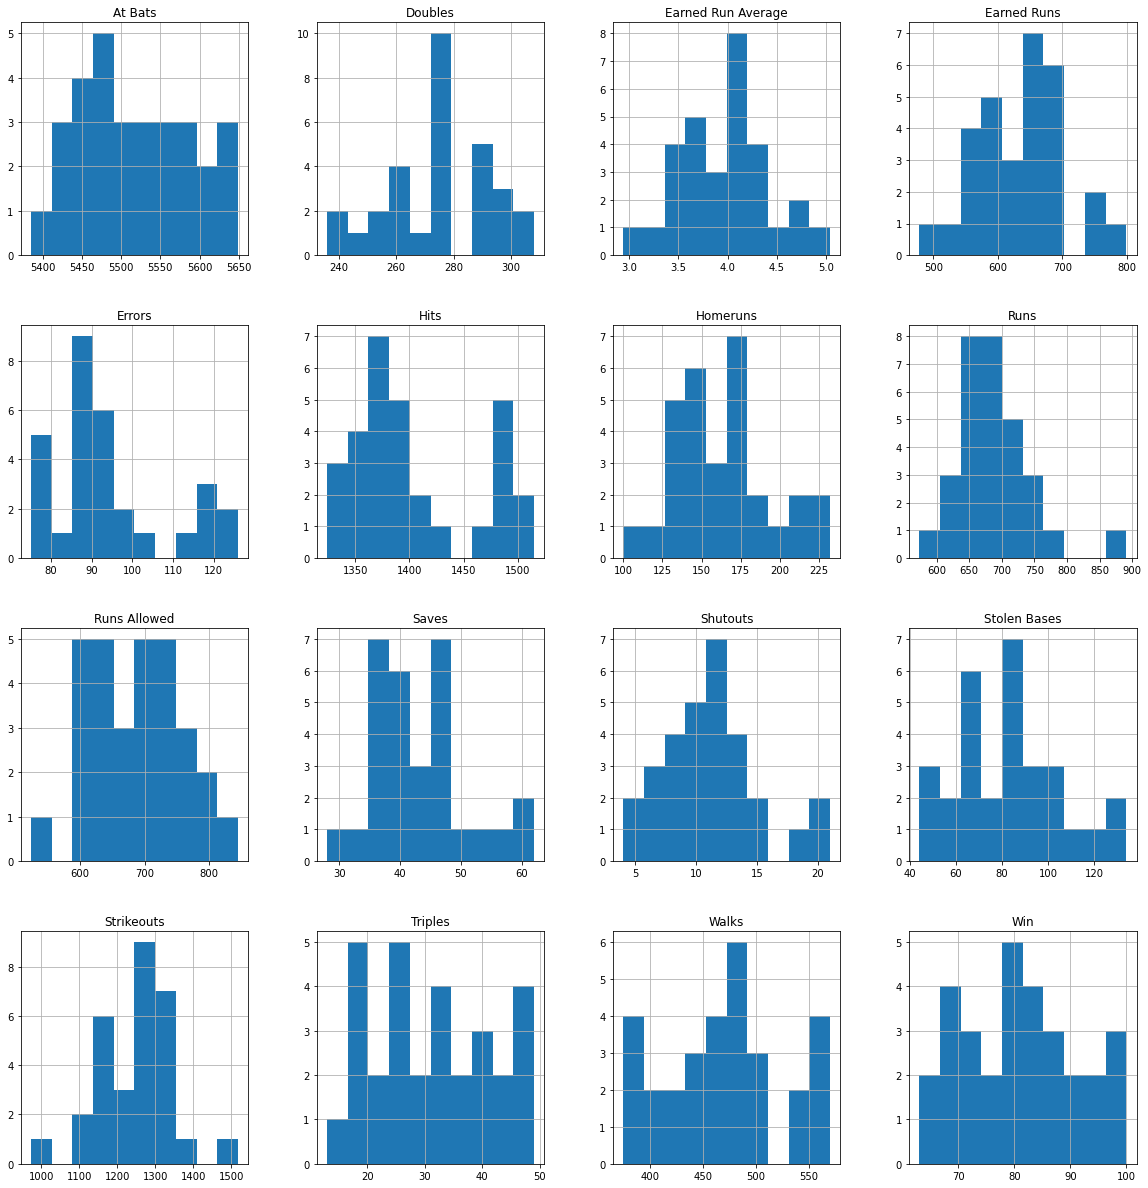

In [212]:
df.hist(figsize=(20,21))
plt.show()

# SCATTERPLOT:

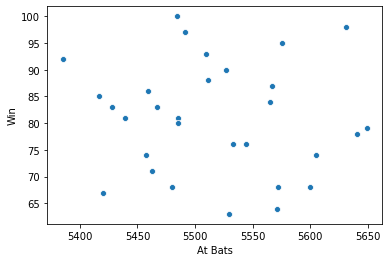

In [213]:
import seaborn as sns
sns.scatterplot(x='At Bats',y='Win',data=df)

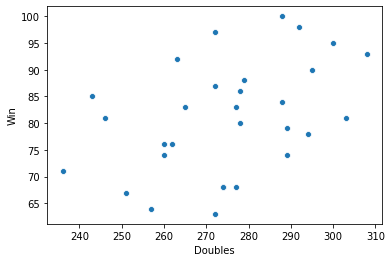

In [214]:
sns.scatterplot(x='Doubles',y='Win',data=df)

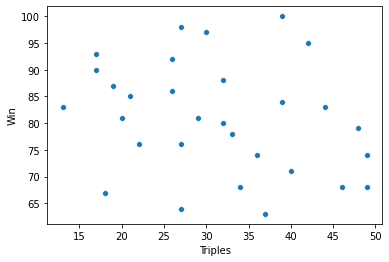

In [215]:
sns.scatterplot(x='Triples',y='Win',data=df)

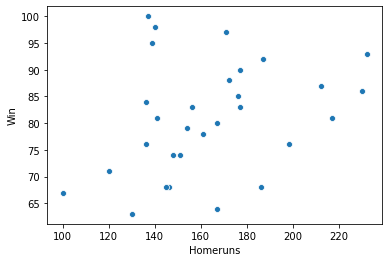

In [216]:
sns.scatterplot(x='Homeruns',y='Win',data=df)

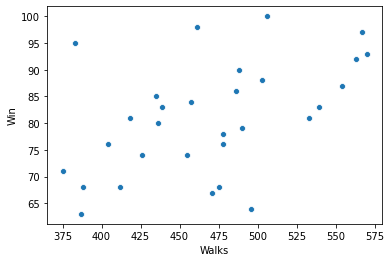

In [217]:
sns.scatterplot(x='Walks',y='Win',data=df)

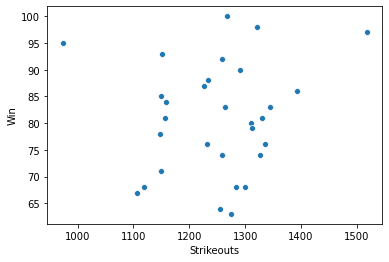

In [218]:
sns.scatterplot(x='Strikeouts',y='Win',data=df)

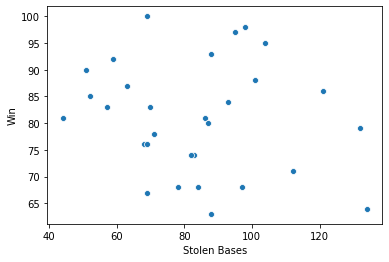

In [219]:
sns.scatterplot(x='Stolen Bases',y='Win',data=df)

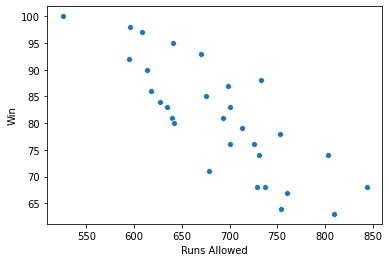

In [220]:
sns.scatterplot(x='Runs Allowed',y='Win',data=df)

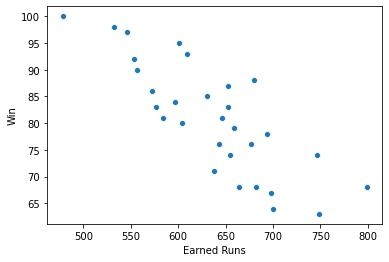

In [221]:
sns.scatterplot(x='Earned Runs',y='Win',data=df)

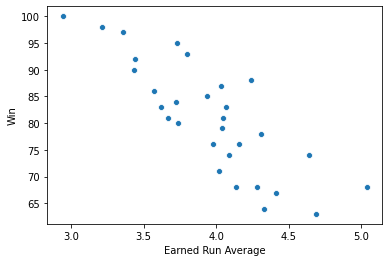

In [222]:
sns.scatterplot(x='Earned Run Average',y='Win',data=df)

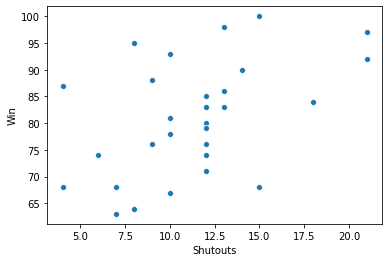

In [223]:
sns.scatterplot(x='Shutouts',y='Win',data=df)

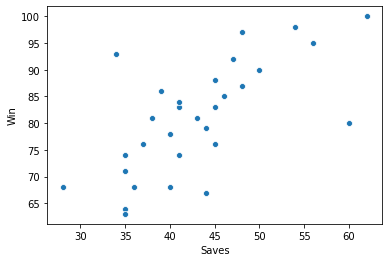

In [224]:
sns.scatterplot(x='Saves',y='Win',data=df)

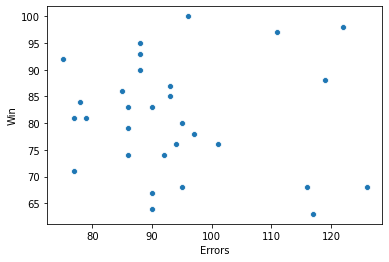

In [225]:
sns.scatterplot(x='Errors',y='Win',data=df)

In [226]:
df.corr()

,Win,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Shutouts,Saves,Errors
Win,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.106563,-0.183418,0.079149


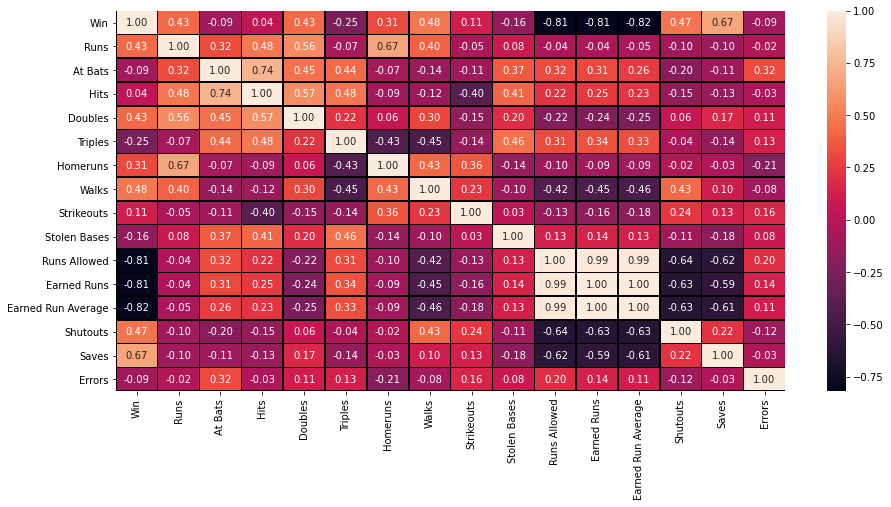

In [227]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

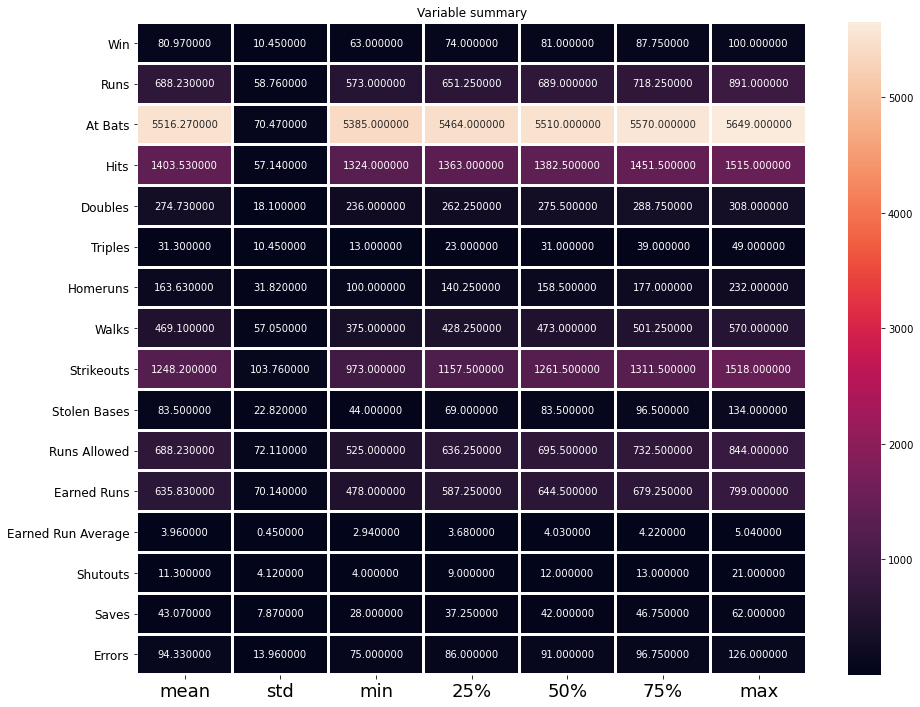

In [228]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable summary")
plt.show()

# outlier checking:

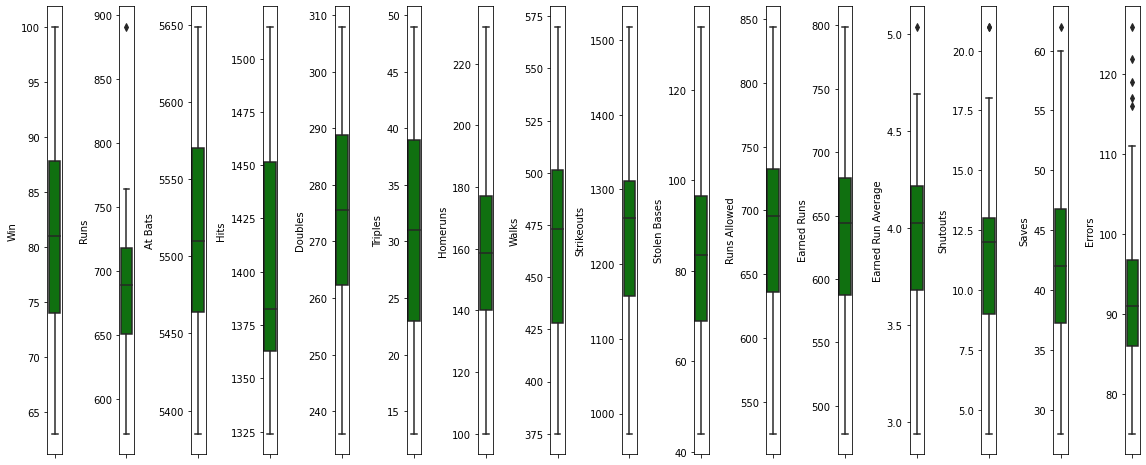

In [229]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [230]:
df.skew()

Win                   0.047089
Runs                  1.200786
At Bats               0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Homeruns              0.516441
Walks                 0.158498
Strikeouts           -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Shutouts              0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

outcome of skewness: the skewness threshold is taken has +/- 0.65, column which has  skewness is 

    
    runs
    errors
    

# Normal Distribution Curve:
    

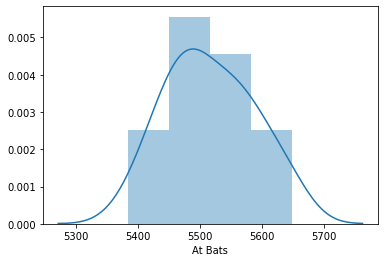

In [231]:
sns.distplot(df["At Bats"])

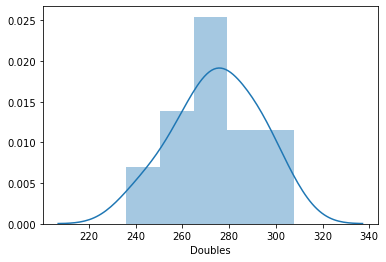

In [232]:
sns.distplot(df["Doubles"])

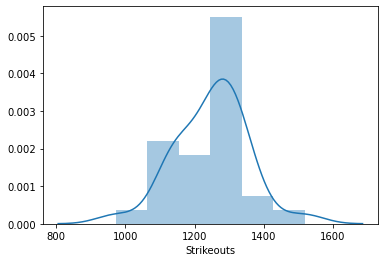

In [233]:
sns.distplot(df["Strikeouts"])

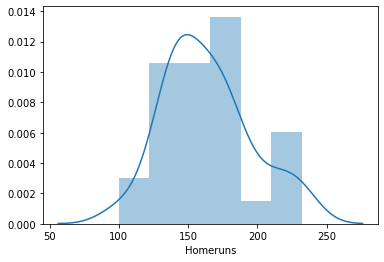

In [234]:
sns.distplot(df["Homeruns"])

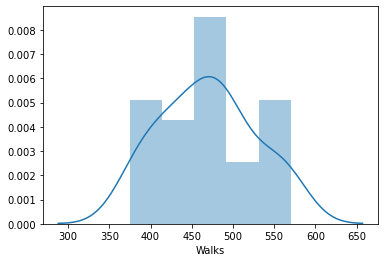

In [235]:
sns.distplot(df["Walks"])

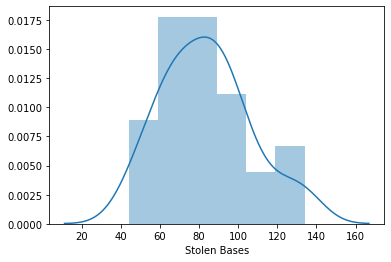

In [236]:
sns.distplot(df["Stolen Bases"])

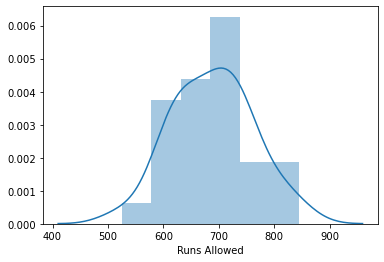

In [237]:
sns.distplot(df["Runs Allowed"])

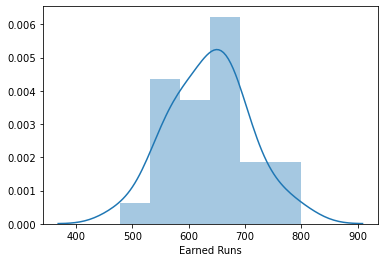

In [238]:
sns.distplot(df["Earned Runs"])

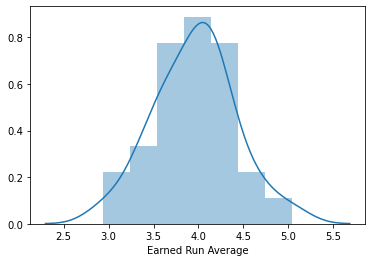

In [239]:
sns.distplot(df["Earned Run Average"])

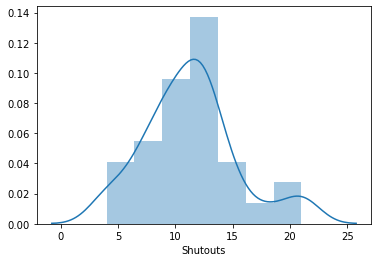

In [240]:
sns.distplot(df["Shutouts"])

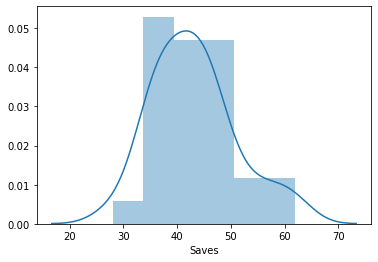

In [241]:
sns.distplot(df["Saves"])

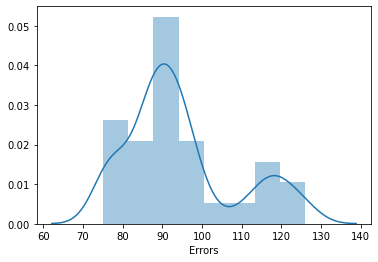

In [242]:
sns.distplot(df["Errors"])

In [243]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(30, 16)

In [244]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [245]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)


(30, 16)
(29, 16)


# Percentage of loss in data:

In [246]:
loss_percent=(30-29)/30*100
print(loss_percent)

3.3333333333333335


In [247]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

# Transform the data to remove skewness:

In [248]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [249]:
x

array([[ 1.38207890e+00,  9.62543504e-01,  0.00000000e+00,
         0.00000000e+00,  1.68518793e+00,  1.00615029e+00,
        -7.41927000e-01, -1.60519802e+00, -2.55061247e+00,
         9.36131648e-01, -6.60978697e-01, -5.08052224e-01,
        -5.09292146e-01, -7.87002186e-01,  1.53275292e+00],
       [ 2.75098810e-01,  2.98863300e-01,  0.00000000e+00,
         0.00000000e+00,  1.38197902e-01,  1.18522654e+00,
        -1.09958425e-01, -4.62095966e-01,  9.36832915e-02,
        -5.16377335e-01,  1.60225829e-01,  2.35800488e-01,
         2.41440214e-01,  2.36736538e-01,  3.12020186e-01],
       [ 8.15199217e-02, -3.12105130e-01,  0.00000000e+00,
         0.00000000e+00,  1.90738550e+00, -2.28819392e-01,
        -6.64354121e-01,  1.23209786e+00, -9.35611465e-01,
         2.25038365e-01, -6.74967476e-01, -7.52213881e-01,
        -6.42097599e-01, -2.52844176e-01, -6.64136739e-01],
       [-4.15211377e-01, -1.30829774e+00,  0.00000000e+00,
         0.00000000e+00, -8.37664770e-01, -4.32227907

In [250]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.38207890e+00,  9.62543504e-01,  0.00000000e+00,
         0.00000000e+00,  1.68518793e+00,  1.00615029e+00,
        -7.41927000e-01, -1.60519802e+00, -2.55061247e+00,
         9.36131648e-01, -6.60978697e-01, -5.08052224e-01,
        -5.09292146e-01, -7.87002186e-01,  1.53275292e+00],
       [ 2.75098810e-01,  2.98863300e-01,  0.00000000e+00,
         0.00000000e+00,  1.38197902e-01,  1.18522654e+00,
        -1.09958425e-01, -4.62095966e-01,  9.36832915e-02,
        -5.16377335e-01,  1.60225829e-01,  2.35800488e-01,
         2.41440214e-01,  2.36736538e-01,  3.12020186e-01],
       [ 8.15199217e-02, -3.12105130e-01,  0.00000000e+00,
         0.00000000e+00,  1.90738550e+00, -2.28819392e-01,
        -6.64354121e-01,  1.23209786e+00, -9.35611465e-01,
         2.25038365e-01, -6.74967476e-01, -7.52213881e-01,
        -6.42097599e-01, -2.52844176e-01, -6.64136739e-01],
       [-4.15211377e-01, -1.30829774e+00,  0.00000000e+00,
         0.00000000e+00, -8.37664770e-01, -4.32227907

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [252]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("at random state",i,"The Model Perform Very Well")
        print("at random_state:-",i)
        print("Training r2_score is:-",accuracy_score(y_train,pred_train)*100)
        print("Training r2_score is:-",accuracy_score(y_test,pred_test)*100)
        
    
    

In [253]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=380)

In [254]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

          86       0.00      0.00      0.00       0.0
          90       0.00      0.00      0.00       1.0
          92       0.00      0.00      0.00       0.0
          93       0.00      0.00      0.00       2.0
          96       0.00      0.00      0.00       1.0
          97       0.00      0.00      0.00       1.0
         111       0.00      0.00      0.00       0.0
         116       0.00      0.00      0.00       0.0
         117       0.00      0.00      0.00       1.0
         122       0.00      0.00      0.00       0.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [255]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100)
    print("accuracy_score is:-",lss*100)
    print("\n")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


At cv:- 2
Cross validation score is:- 3.571428571428571
accuracy_score is:- 66.66666666666666


At cv:- 3
Cross validation score is:- 10.37037037037037
accuracy_score is:- 66.66666666666666




ValueError: n_splits=4 cannot be greater than the number of members in each class.

# saving Model:

In [ ]:
    import pickle
    filename = 'baseballcasestudy.pkl'
    pickle.dump(df,open(filename,'wb'))

In [ ]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com